In [4]:
%pip install dask
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\maxvi\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.9/28.0 MB 16.7 MB/s eta 0:00:02
   --------- ------------------------------ 6.6/28.0 MB 16.8 MB/s eta 0:00:02
   -------------- ------------------------- 10.0/28.0 MB 16.3 MB/s eta 0:00:02
   ------------------- -------------------- 13.4/28.0 MB 16.1 MB/s eta 0:00:01
   ---------------------- ----------------- 16.0/28.0 MB 15.2 MB/s eta 0:00:01
   ------------------------- -------------- 17.8/28.0 MB 14.4 MB/s eta 0:00:01
   ----------------------------- ---------- 20.7/28.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------- ----- 24.1/28.0 MB 14.3 MB/s eta 0:00:01
   ------------------------------------- -- 26.5/28.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------  27.8/28.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 28.0/28.0 MB 13.0 MB/s  0:00:02
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\maxvi\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


In [1]:
import dask
import dask.dataframe as dd
# When dask uses pandas 2.0.0+ it casts object columns to string automatically ([("i", 0.48)] -> '[("i", 0.48)]')
dask.config.set({"dataframe.convert-string": False})

dataset_path = r"C:\Users\maxvi\Downloads\smadex-challenge-predict-the-revenue\train"
filters = [("datetime", ">=", "2025-10-01-00-00"), ("datetime", "<", "2025-10-13-00-00")]

ddf = dd.read_parquet(
    dataset_path,
    filters=filters
)


In [2]:
# Convertim la Sèrie de Dtypes a un DataFrame i després a llista
dtypes_list = ddf.dtypes.to_frame().reset_index().values.tolist()

# Imprimeix la llista completa. Això és menys probable que es trunqui
for column, dtype in dtypes_list:
    print(f"{column}: {dtype}")

buyer_d1: int32
buyer_d7: int32
buyer_d14: int32
buyer_d28: int32
buy_d7: int64
buy_d14: int64
buy_d28: int64
iap_revenue_d7: float64
iap_revenue_d14: float64
iap_revenue_d28: float64
registration: int32
retention_d1_to_d7: int32
retention_d3_to_d7: int32
retention_d7_to_d14: int32
retention_d1: int32
retention_d3: int32
retentiond7: int32
advertiser_bundle: object
advertiser_category: object
advertiser_subcategory: object
advertiser_bottom_taxonomy_level: object
carrier: object
country: object
region: object
dev_make: object
dev_model: object
dev_os: object
dev_osv: object
hour: object
release_date: object
release_msrp: int64
weekday: int32
avg_act_days: float64
avg_daily_sessions: object
avg_days_ins: float64
avg_duration: object
bcat: object
bcat_bottom_taxonomy: object
bundles_cat: object
bundles_cat_bottom_taxonomy: object
bundles_ins: object
city_hist: object
country_hist: object
cpm: object
cpm_pct_rk: object
ctr: object
ctr_pct_rk: object
dev_language_hist: object
dev_osv_hist:

In [54]:
ddf_min = ddf[['iap_revenue_d7','buyer_d7','buy_d7','retention_d3_to_d7','advertiser_category','release_msrp','weeks_since_first_seen']]
ddf_min.head()


,iap_revenue_d7,buyer_d7,buy_d7,retention_d3_to_d7,advertiser_category,release_msrp,weeks_since_first_seen
0,2.147718,1,1,1.0,game,NaN,6.0
1,0.000000,0,0,0.0,sport betting,1380.0,NaN
2,0.000000,0,0,1.0,games,1199.0,6.0
3,0.000000,0,0,NaN,sport betting,227.0,6.0
4,0.000000,0,0,0.0,game,299.0,6.0


In [55]:
# Drop de totes les files amb NaN en qualsevol columna
ddf_min_clean = ddf_min.dropna()

row = len(ddf_min_clean)
print(f"Nombre de files després del drop de NaN: {row}")

Nombre de files després del drop de NaN: 8938173


In [56]:
value_counts = ddf_min_clean['iap_revenue_d7'].value_counts().compute()

print(value_counts)

iap_revenue_d7
0.000638         2
0.001607         1
0.001768         1
0.002694         1
0.003242         1
                ..
6442.034497      1
8670.000000      1
9344.000000      1
42853.100080     1
123197.000000    1
Name: count, Length: 99247, dtype: int64


In [57]:
import pandas as pd
import numpy as np
import verifyml.model_card_toolkit as mctlib
import verifyml.model_tests.utils as utils
import seaborn as sns
import uuid
import matplotlib.pyplot as plt

from datetime import date
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from IPython.display import Markdown, HTML

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [58]:
import numpy as np

# 1. Transformació logarítmica del target
ddf_min_clean['log_iap_revenue_d7'] = ddf_min_clean['iap_revenue_d7'].apply(
    lambda x: np.log1p(x), 
    meta=('log_iap_revenue_d7', 'float64')
)

# 2. Crea la variable 'y' utilitzant el target transformat
y = ddf_min_clean['log_iap_revenue_d7']

# 3. Elimina el target original i la variable auxiliar 'buyer_d7' del set de features X
X = ddf_min_clean.drop(columns=['iap_revenue_d7', 'log_iap_revenue_d7', 'buyer_d7'])

In [59]:
# Columna a codificar
# Columna a codificar
categorical_col = 'advertiser_category'

# 1. Converteix la columna a tipus 'category' (fet al pas anterior)
X[categorical_col] = X[categorical_col].astype('category') 

# ⚠️ 2. FORÇA DASK A CONÈIXER TOTS ELS VALORS ÚNICS
# Aquest pas executa un petit càlcul per trobar totes les categories
X[categorical_col] = X[categorical_col].cat.as_known()

# 3. Ara aplica el One-Hot Encoding (hauria de funcionar)
X = dd.get_dummies(
    X, 
    columns=[categorical_col], 
    prefix='cat', 
    drop_first=True
)
# 3. Comprova les columnes noves (opcional, requerirà .compute() si ho fas amb .head())
# print(X.columns)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error, mean_squared_error

# --- 1. Materialització de Dades (fet segons la teva sortida) ---
X_pd = X.compute() 
y_pd = y.compute() 

# Columnes objectes problemàtiques identificades:
problematic_cols = []

print("Aplicant neteja final a columnes 'object'...")

# --- 2. Conversió Forçada a Numèric i Neteja ---
for col in problematic_cols:
    # 2.1. Intentem convertir a numèric. 'coerce' reemplaçarà qualsevol valor 
    # no numèric (com cadenes de text o nuls residuals) amb NaN.
    X_pd[col] = pd.to_numeric(X_pd[col], errors='coerce') 
    
    # 2.2. Omplim els NaNs resultants amb 0, ja que són mètriques d'historial
    X_pd[col] = X_pd[col].fillna(0).astype('float32') # Utilitzem float32 per estalviar espai

# --- 3. Conversió de Booleans a Int (Per seguretat) ---
bool_cols = X_pd.select_dtypes(include=['bool']).columns
for col in bool_cols:
    X_pd[col] = X_pd[col].astype(int)

# --- 4. Divisió Train/Test ---
# Les dades X_pd ja haurien de ser completament numèriques
X_train, X_test, y_train, y_test = train_test_split(
    X_pd, 
    y_pd, 
    test_size=0.2, 
    random_state=42
)

print("\nDivisió de dades completada. Començant l'entrenament.")
print(f"Mida X_train: {X_train.shape}, Mida X_test: {X_test.shape}")

Aplicant neteja final a columnes 'object'...


KeyError: 'iap_revenue_usd_bundle'

In [52]:
# --- 5. Entrenament amb LightGBM ---
lgb_regressor = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    n_estimators=200, # Augmentem el nombre d'estimadors
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

lgb_regressor.fit(X_train, y_train)

# --- 6. Predicció i Avaluació ---
y_pred_log = lgb_regressor.predict(X_test)

# Desfer la transformació logarítmica (e^x - 1)
y_pred_real = np.expm1(y_pred_log)
# Això s'executa després de la predicció al test set (y_pred_real)
num_zeros = (y_pred_real == 0).sum()
num_total = len(y_pred_real)

print(f"Total de prediccions: {num_total}")
print(f"Prediccions exactament iguals a 0: {num_zeros}")
print(f"Percentatge de prediccions a 0: {100 * (num_zeros / num_total):.2f}%")
print(f"Mínim de les prediccions: {y_pred_real.min():.4f}")
print(f"Màxim de les prediccions: {y_pred_real.max():.4f}")

# Si el teu mínim és molt proper a zero (p. ex., 1e-10) però no exactament zero, 
# el model ja està predient valors positius.
y_test_real = np.expm1(y_test)

# Asegurar que els ingressos predits no són negatius
y_pred_real[y_pred_real < 0] = 0

# Calcular MSLE (Mean Squared Logarithmic Error)
msle_score = mean_squared_log_error(y_test_real, y_pred_real)
mse_score = mean_squared_error(y_test_real, y_pred_real)
rmse_score = np.sqrt(mse_score) # Apliquem l'arrel quadrada sobre l'MSE

print("\n--- Resultats del Model LightGBM ---")
print(f"MSLE (Mètrica del Repte): {msle_score:.6f}")
print(f"RMSE (Escala Real): {rmse_score:.2f} USD")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 476987, number of used features: 24
[LightGBM] [Info] Start training from score 0.259562
Total de prediccions: 119247
Prediccions exactament iguals a 0: 0
Percentatge de prediccions a 0: 0.00%
Mínim de les prediccions: -0.3918
Màxim de les prediccions: 3230.5758

--- Resultats del Model LightGBM ---
MSLE (Mètrica del Repte): 0.107562
RMSE (Escala Real): 147.71 USD


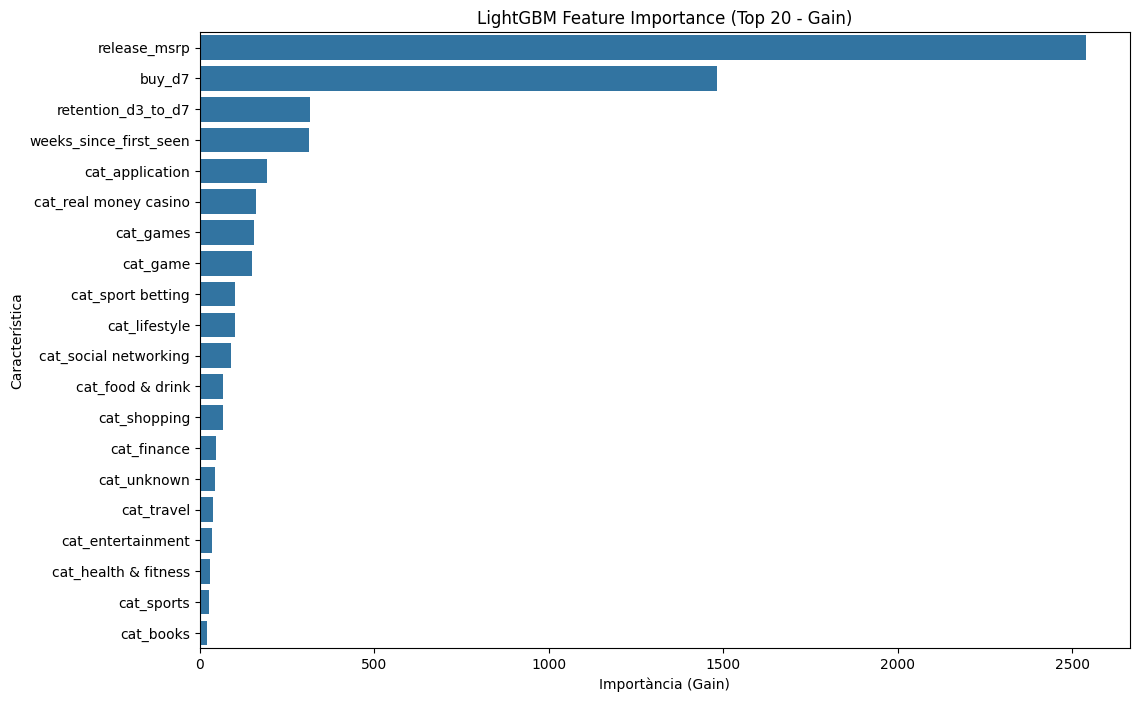


Total de característiques usades: 27
Total de característiques amb Importància > 0: 22


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Obtenció de la importància de característiques (Tipus 'gain' per defecte en LightGBM)
# Aquest pas assumeix que el teu model entrenat es diu 'lgb_regressor'
feature_imp = pd.Series(
    lgb_regressor.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

# 2. Creació d'un DataFrame per a la visualització
df_feature_imp = pd.DataFrame(feature_imp, columns=['Importance']).reset_index()
df_feature_imp.columns = ['Feature', 'Importance']

# 3. Visualització (mostrant el top 20)
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=df_feature_imp.head(20))
plt.title('LightGBM Feature Importance (Top 20 - Gain)')
plt.xlabel('Importància (Gain)')
plt.ylabel('Característica')
plt.show()

# 4. Identificar característiques inútils
features_to_keep = df_feature_imp[df_feature_imp['Importance'] > 0]['Feature'].tolist()
print(f"\nTotal de característiques usades: {len(X_train.columns)}")
print(f"Total de característiques amb Importància > 0: {len(features_to_keep)}")